In [49]:
import seaborn as sns #% matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris



In [50]:
# Load the data 
file_path = 'C:\Employer_Ratings.xlsx'
data = pd.read_excel(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Anshika Singh\AppData\Local\Temp\ipykernel_7376\1079946850.py:2: SyntaxWarning: invalid escape sequence '\E'
  file_path = 'C:\Employer_Ratings.xlsx'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COMPANY               114 non-null    object 
 1   Work life Balance     114 non-null    float64
 2   Company Culture       114 non-null    float64
 3   Skill Development     114 non-null    float64
 4   Job Security          114 non-null    float64
 5   Salary & Benefits     114 non-null    float64
 6   Work satisfaction     114 non-null    float64
 7   Promotions/Appraisal  114 non-null    float64
 8   Overall rating        112 non-null    float64
 9   Management            113 non-null    float64
dtypes: float64(9), object(1)
memory usage: 9.0+ KB


<Axes: >

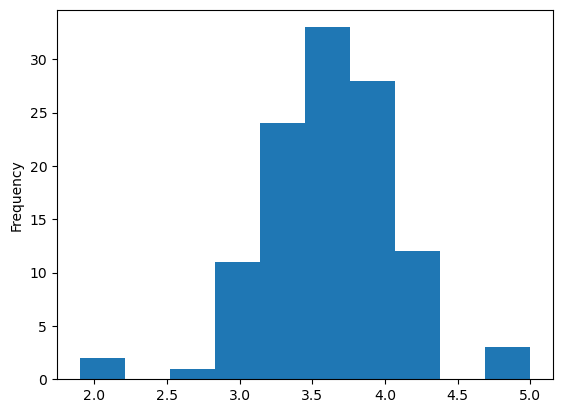

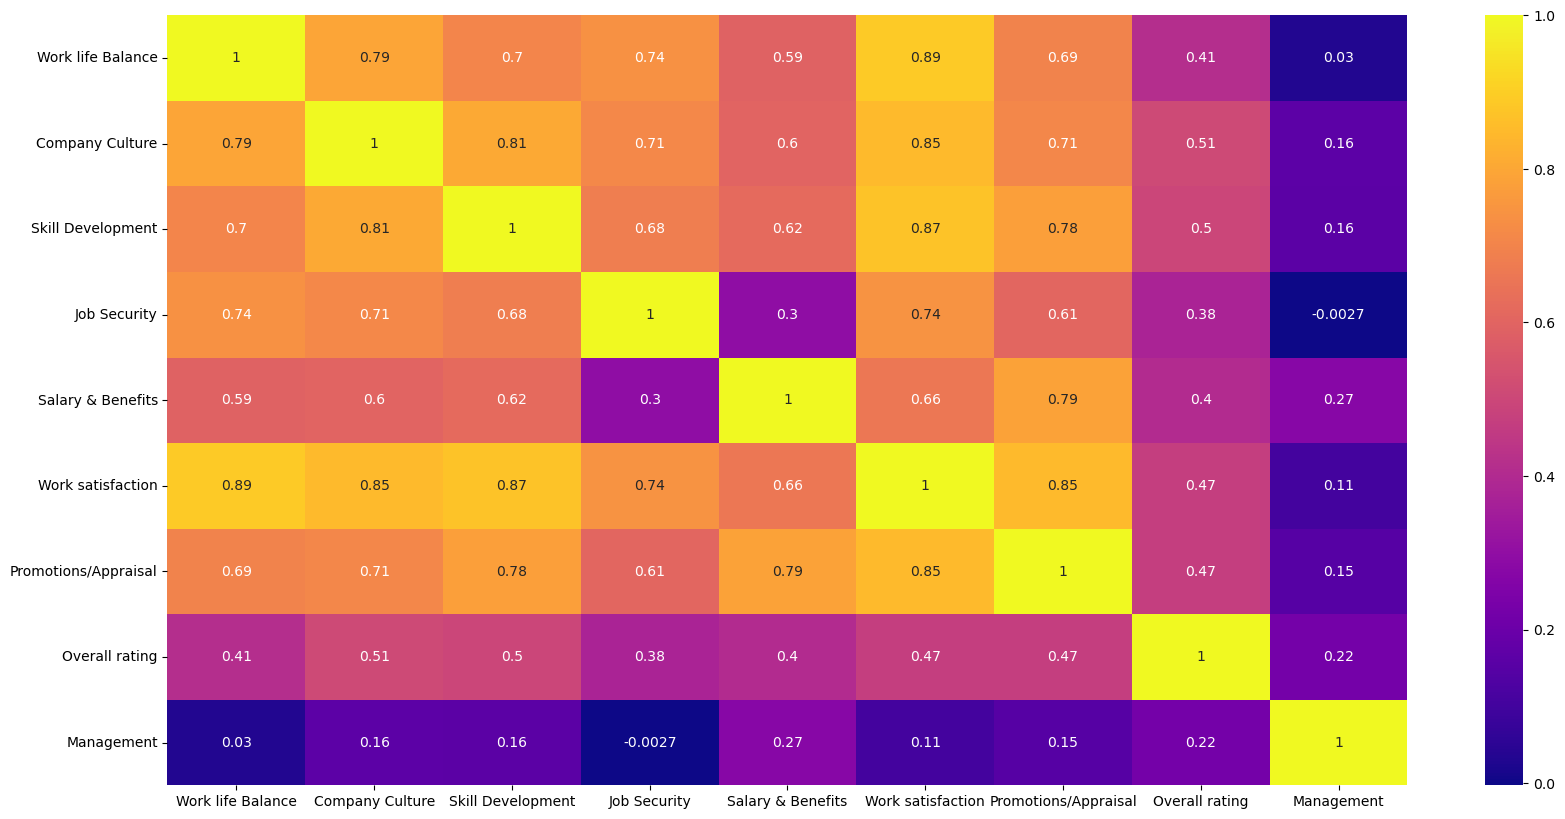

In [51]:
data.head()
data.head(n=10)
data.describe()
data.info()

#data.corr(method='pearson',numeric_only=True)
#distribution about our data





#correlation 
import seaborn as sns
import matplotlib.pyplot as plt
numcols['Work life Balance'].plot(kind='hist')

plt.figure(figsize=(20,10))
numcols = data.select_dtypes(include=np.number)

sns.heatmap(numcols.corr(), annot=True, cmap="plasma")   
#numcols['Work satisfaction'].plot(kind='hist')



In [52]:
#data post clean up
# Fill missing values with the mean
data_filled = data.fillna(data.mean(numeric_only=True))
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())


In [53]:
# Drop the 'COMPANY' column, as it's non-numeric and won't be used for clustering
X = data_filled.drop(columns=['COMPANY'])
# Standardize the features scaler = StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X.head()
#print(scaler)
#print(X_scaled)

C:\Users\Anshika Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 1 0 1]


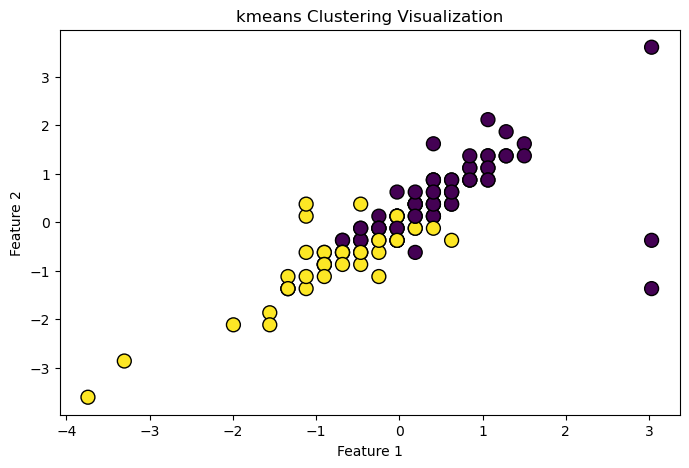

In [54]:
# Apply K-means clustering with 2 clusters - Because we need to bifurcate the Organisations into 2 groups - Employee friendly and not so employee friendly
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
print(clusters)
# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=100, edgecolors='black')
plt.title('kmeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [55]:
# Add the cluster labels to the data
data_filled['Cluster'] = clusters

In [56]:
# Define "good" and "bad" companies based on clusters
data_filled['Company Type'] = data_filled['Cluster'].apply(lambda x: 'Good' if x == 1 else 'Bad')
print(data_filled)

                      COMPANY  Work life Balance  Company Culture  \
0                      Zensar                3.8              3.6   
1                    Lenskart                3.0              3.0   
2                       Ramco                3.2              3.2   
3                      Dimagi                3.1              3.6   
4                       Wipro                3.7              3.7   
..                        ...                ...              ...   
109                       Ola                3.2              3.1   
110                  Cardekho                3.6              3.5   
111  Ness Digital Engineering                3.6              3.4   
112                  Cloudera                4.3              4.1   
113                 Unacademy                2.7              2.7   

     Skill Development  Job Security  Salary & Benefits  Work satisfaction  \
0                  3.6           3.5                3.5                3.4   
1              

In [57]:
# Preparing data for supervised learning 
# Using Overall rating as target for classification
X = data_filled.drop(columns=['COMPANY', 'Cluster', 'Company Type']) 
y = data_filled['Company Type'].apply(lambda x: 1 if x == 'Good' else 0)

In [58]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Predict and evaluate 
y_pred = clf.predict(X_test) 



print("Accuracy:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.97        19

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [33]:
# View the classification results for each company
print(data_filled[['COMPANY', 'Company Type']])  

                      COMPANY Company Type
0                      Zensar          Bad
1                    Lenskart         Good
2                       Ramco         Good
3                      Dimagi         Good
4                       Wipro          Bad
..                        ...          ...
109                       Ola         Good
110                  Cardekho          Bad
111  Ness Digital Engineering         Good
112                  Cloudera          Bad
113                 Unacademy         Good

[114 rows x 2 columns]


In [35]:
# Optional: Save the cleaned data with classifications
cleaned_file_path = 'Cleaned_Unofficial_with_Classificat1.xlsx'
data_filled.to_excel(cleaned_file_path, index=False)
print(f"Cleaned data saved as {cleaned_file_path}")

Cleaned data saved as Cleaned_Unofficial_with_Classificat1.xlsx
